In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D
from sklearn.neighbors import KNeighborsClassifier

Let's start by applying the Algorithm with the 3 players

In [7]:
X = np.genfromtxt('../features/features_julian_paul_sarah.csv', delimiter=',')
y = np.genfromtxt('../features/output_julian_paul_sarah.csv', delimiter=',')

## Applying PCA

In [8]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

# On crée notre modèle pour obtenir 2 composantes
model_pca2 = PCA(n_components = 2)

# On entraîne notre modèle (fit) sur les données
model_pca2.fit(X)

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

## Applying K-means    


In [9]:
def visualiser_modele(model):
    
    levels = [0, 1, 2, 3]
    colors = ['red', 'yellow', 'blue']
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)
    
    # On crée un tableau de coordonnées pour chaque point du plan (une grille)
    xx, yy = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-1.5, 1.6, 0.1))
    X_grid = np.c_[xx.flatten(), yy.flatten()]

    # On calcule ce que prédit le classifier en chaque point de ce plan
    y_grid = model.predict(X_grid)

    # On dessine ce que le modèle prévoit sur le plan
    plt.contourf(xx, yy, y_grid.reshape(xx.shape), cmap='Spectral')

    # On affiche les points du training en contour noir
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker = "o", norm=norm, cmap=cmap, edgeColor='black')

    # On affiche les points du test en contour blanc
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker ="o",norm=norm, cmap=cmap, edgeColor='white', linewidths=2)
    
#visualiser_modele(model_knn)

Précision : 49%


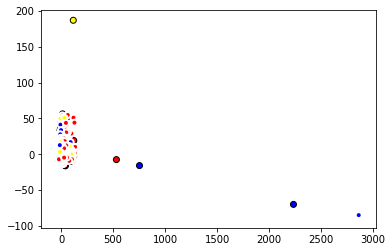

In [10]:
#applying K-means    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

Let's apply k-neighors now with only Julien and Sarah with a 2-dimension PCA

In [11]:
X = np.genfromtxt('../features/features_julian_sarah.csv', delimiter=',')
y = np.genfromtxt('../features/output_julian_sarah.csv', delimiter=',')

Précision : 71%


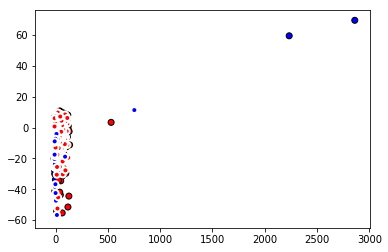

In [12]:
#applying K-means    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca2 = PCA(n_components = 2)
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)


# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

Let's try a 3-dimension PCA now

In [13]:
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
#X = np.genfromtxt('features_julian_sarah.csv', delimiter=',')
#y = np.genfromtxt('output_julian_sarah.csv', delimiter=',')

#p = np.random.permutation(len(X))
#X, y = X[p], y[p]

model_pca3 = PCA(n_components=3)
model_pca3.fit(X)
X_reduced3 = model_pca3.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced3[:int(l*training_ratio)]
X_test = X_reduced3[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))


Précision : 71%


The precision increased from 72% to 74% using a PCA of dimension 3. Let's analyse using a PCA of dimension 10

In [14]:
model_pca10 = PCA(n_components=10)
model_pca10.fit(X)
X_reduced10 = model_pca3.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced10[:int(l*training_ratio)]
X_test = X_reduced10[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

Précision : 71%


The precision doesn't change.

## We'll now use the features vector generated by the whole wave instead of each balloon

In [15]:
X = np.genfromtxt('../features/features_wave_julian_paul_sarah.csv', delimiter=',')
y = np.genfromtxt('../features/output_wave_julian_paul_sarah.csv', delimiter=',')

Précision : 56%


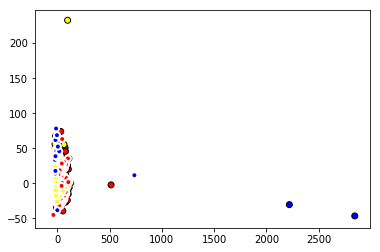

In [16]:
#applying K-means    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

We notice that the precision increased from 48% to 55% by computing the features on a whole wave instead of computing for each balloon

Now let's try with the dataset of only Julian and Sarah

In [17]:
X = np.genfromtxt('../features/features_wave_julian_sarah.csv', delimiter=',')
y = np.genfromtxt('../features/output_wave_julian_sarah.csv', delimiter=',')

Précision : 78%


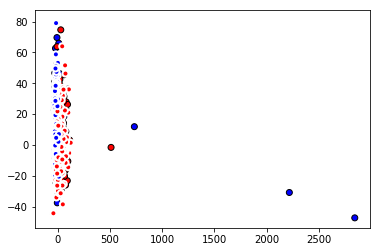

In [18]:
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca2 = PCA(n_components = 2)
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)


# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

We notice that it also improves!!! From 72% to 80%. Let's try now with a 10 dimension PCA

In [19]:
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca10 = PCA(n_components=10)
model_pca10.fit(X)
X_reduced10 = model_pca10.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced10[:int(l*training_ratio)]
X_test = X_reduced10[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

Précision : 82%


 Let's now use concatenate feature vectors instead of the last two ways (features for each balloon and features by each wave)

Now we'll take bucketized features for the nb_turns and nb_v

For the dataset of Julian and Sarah we get:

In [20]:
X = np.genfromtxt('../features/features_bucket_wave_julian_sarah.csv', delimiter=',')
y = np.genfromtxt('../features/output_bucket_wave_julian_sarah.csv', delimiter=',')

Précision : 78%


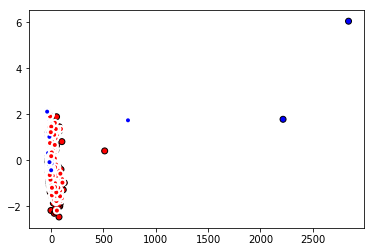

In [21]:
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca2 = PCA(n_components = 2)
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)


# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

We notice that bucketizing the features doesn't change a lot our performance.
Let's try with a 10d-PCA

In [22]:
model_pca10 = PCA(n_components=10)
model_pca10.fit(X)
X_reduced10 = model_pca10.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced10[:int(l*training_ratio)]
X_test = X_reduced10[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

Précision : 78%


With 10 dimension PCA we notice that our accuracy is even worse (80% against the 81% we had before)